# Python: Drugie zadanie domowe

Drugie zadanie domowe będzie polegać na opracowaniu danych zawartych w pliku `gapminder.csv`, który znajduje się w tym katalogu (proszę wykorzystać ten plik, a nie ten w katalogu labs04). Ten arkusz poprowadzi Cię krok po kroku po zadaniu domowym.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**zad. 1** Wczytaj dane do zmiennej `data`, w taki sposób, żeby nazwa Państwa była kluczem.

In [5]:
# index_col = 0 >> użyjemy kolumny Country jako nazwy wierszy
data = pd.read_csv('gapminder.csv', index_col = 0)

In [6]:
data.head()

,female_BMI,male_BMI,gdp,population,under5mortality,life_expectancy,fertility
Country,,,,,,,
Afghanistan,21.07402,20.62058,1311.0,26528741.0,110.4,52.8,6.20
Albania,25.65726,26.44657,8644.0,2968026.0,17.9,76.8,1.76
Algeria,26.36841,24.59620,12314.0,34811059.0,29.5,75.5,2.73
Angola,23.48431,22.25083,7103.0,19842251.0,192.0,56.7,6.43
Antigua and Barbuda,27.50545,25.76602,25736.0,85350.0,10.9,75.5,2.16


**zad. 2** Znajdź najbardziej i najmniej zaludnione państwa na świecie.

In [7]:
data['population'].idxmax()

'China'

In [8]:
data['population'].idxmin()

'Antigua and Barbuda'

**zad. 3** W ilu państwach współczynnik `female_BMI` jest większy od `male_BMI`.

In [9]:
BMI_comp = data['female_BMI'] > data['male_BMI']
data[BMI_comp]

,female_BMI,male_BMI,gdp,population,under5mortality,life_expectancy,fertility
Country,,,,,,,
Afghanistan,21.07402,20.62058,1311.0,26528741.0,110.4,52.8,6.20
Algeria,26.36841,24.59620,12314.0,34811059.0,29.5,75.5,2.73
Angola,23.48431,22.25083,7103.0,19842251.0,192.0,56.7,6.43
Antigua and Barbuda,27.50545,25.76602,25736.0,85350.0,10.9,75.5,2.16
Armenia,27.13420,25.35542,7383.0,2975029.0,20.0,72.3,1.40
...,...,...,...,...,...,...,...
Venezuela,28.13408,27.44500,17911.0,28116716.0,17.1,74.2,2.53
Vietnam,21.06500,20.91630,4085.0,86589342.0,26.2,74.1,1.86
Palestine,29.02643,26.57750,3564.0,3854667.0,24.7,74.1,4.38


**zad. 4**
 1. Zainstaluj bibliotekę `pycountry_convert` i zaimportuj ją.
 1. Dodaj do danych kolumnę `continent`, która będzie zawierać nazwę kontynentu, na którym jest położone dane państwo. Wykorzystaj bibliotekę `pycountry_convert`. *Uwaga*: trzeba najpierw uzystać kod państwa w fomacie ISO-2, następnie uzystkać kod kontynentu, a na końcu uzyskać nazwę kontynentu.

In [10]:
# pip install pycountry_convert
import pycountry_convert as pyc

In [11]:
def country_continent(country):
    # map country name to country_iso name:
    country_iso = pyc.country_name_to_country_alpha2(country, cn_name_format="default")
    # convert country_iso to continent code
    country_cont= pyc.country_alpha2_to_continent_code(country_iso)
    return country_cont

In [12]:
iso = data.index.map(country_continent)
iso

Index(['AS', 'EU', 'AF', 'AF', 'NA', 'SA', 'AS', 'OC', 'EU', 'AS',
       ...
       'EU', 'NA', 'SA', 'AS', 'OC', 'SA', 'AS', 'AS', 'AF', 'AF'],
      dtype='object', name='Country', length=175)

In [13]:
data['Continent_code'] = iso
data.head()

,female_BMI,male_BMI,gdp,population,under5mortality,life_expectancy,fertility,Continent_code
Country,,,,,,,,
Afghanistan,21.07402,20.62058,1311.0,26528741.0,110.4,52.8,6.20,AS
Albania,25.65726,26.44657,8644.0,2968026.0,17.9,76.8,1.76,EU
Algeria,26.36841,24.59620,12314.0,34811059.0,29.5,75.5,2.73,AF
Angola,23.48431,22.25083,7103.0,19842251.0,192.0,56.7,6.43,AF
Antigua and Barbuda,27.50545,25.76602,25736.0,85350.0,10.9,75.5,2.16,NA


In [62]:
print(data['Continent_code'].unique())

['AS' 'EU' 'AF' 'NA' 'SA' 'OC']


**zad. 5**
Oblicz ile osób mieszka na każdym z kontynentów.

In [14]:
data[['Continent_code', 'population']].groupby('Continent_code').sum()

,population
Continent_code,
AF,9.772803e+08
AS,3.949400e+09
EU,7.219954e+08
NA,5.235798e+08
OC,3.425711e+07
SA,3.881582e+08


**zad. 6** Narysyj wykres słupkowy pokazujący ile państw leży na każdym z kontynentów.

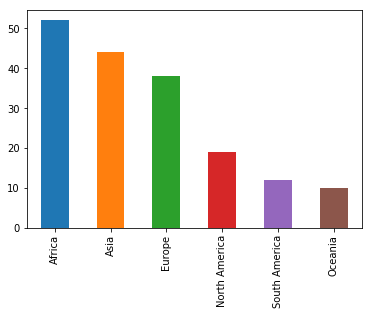

**zad. 7** 
 * Kolumna `gdp` zawiera informacje o PKB na obywatela. Stwórz nową kolumnę `gdp_total`, która będzie informować o PKB danego kraju.
 * Oblicz ile wynosi suma światowego PKB (kolumna `gdp_total`).
 * Oblicz ile krajów jest odpowiedzialnych za wytworzenie 80% światego PKB.

**zad. 8** Wyświetl wszystkie europejskie państwa, w których oczekiwana długość życia wynosi conajmniej 80 lat. 

**zad. 9** Znajdź państwo, które ma najbardziej zbliżone PKB do Polski. Spróbuj rozwiązać to zadanie w jednej linijce.

**zad. 10 (ostatnie)**
 * Zobacz czy masz zainstalowaną bibliotekę `requests`, która sluży do wykonywania zapytań HTTP. Jeżeli nie, to zainstaluj ją. 
 * Uruchom z funkcję `requests.get` podając jako argument link: `https://aws.random.cat/meow`. Wynik zapisz do zmiennej response.
 * Wykonaj metodę `json()` na zmiennej `response` która zwróci Ci słownik, w którym będzie klucz `file`. Zapisz wartość `file` do zmiennej `url`.
 * Zaimportuj `Image` i `display` z biblioteki `from IPython.core.display`.
 * Stwórz obiekt Image podając w konstruktorze zmienną `url`,a wynik zapisz do `image`.
 * Wykonaj funkcję `display` na obiekcie `image`.
 

In [24]:
pip list

Package                       Version
----------------------------- --------------------
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryornot                   0.4.4
bitarray                      2.5.1
bkcharts                      0.2
blac

In [26]:
import requests as r